# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных

**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата


**Целевой признак**
- Exited — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-данных" data-toc-modified-id="Изучение-общей-информации-о-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение общей информации о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Изучение-взаимосвязей-в-данных" data-toc-modified-id="Изучение-взаимосвязей-в-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение взаимосвязей в данных</a></span></li><li><span><a href="#Разбиение-данных-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разбиение-данных-на-обучающую-и-тестовую-выборки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Разбиение данных на обучающую и тестовую выборки</a></span></li><li><span><a href="#Мастштабирование-признаков" data-toc-modified-id="Мастштабирование-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Мастштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

Импортируем все необходимые для работы библиотеки и инструменты:

In [1]:
import pandas as pd                                   
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier             
from sklearn.ensemble import RandomForestClassifier         
from sklearn.linear_model import LogisticRegression                         
from sklearn.metrics import (
    f1_score, 
    accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score, 
    roc_auc_score,
    roc_curve,
    plot_roc_curve,
    auc
)
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid') 

Зададим значение seed для параметров random_state.

In [2]:
seed = 31313131

### Изучение общей информации о данных

Информация о клиентах предоставлена в виде файла .csv, откроем его используя pandas и сохраним в переменной df.

In [3]:
df = pd.read_csv('/datasets/Churn.csv')

Изучим сам датасет. Для этого выведем первые 5 строк датафрейма:

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

В нашем датафрейме содержится 10000 строк, где каждая строка это уникальный клиент, а так же 14 признаков, которые содержат следующую информацию о клиентах банка:

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — количество недвижимости у клиента
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата
* Exited — факт ухода клиента


Сами столбцы записаны с прописной буквы в неудобном виде. Стоит изменить их названия на этапе предобработки.

Изучим так же общую информацию о датафрейме:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df['Tenure'].isnull().sum()

909

В датафрейме содержатся данные разных типов: float64, int64 и object. При этом в столбце Tenure предполагается наличие целочисленного типа данных.

Так же в столбце Tenure присутствуют пропущенные значения. У нас нет точной информации, откуда появились пропуски. Заполним пропущенные значения медианой.


Проверим так же наличие явных дубликатов в датафрейме:

In [8]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

Подробнее изучим данные, содержащиеся в столбцах:

In [9]:
df.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Целевым признаком в датасете является столбец **Exited**, в котором присутсвует два значения 0 и 1, причем 1 означает, что клиент более не пользуется услугами банка. Распределение классов целевого признака следующее:

    
* Пользуются услугами банка - 0.7963
* Не пользуются услугами банка - 0.2037


Лишние признаки, от которых стоит избавиться на этапе предобработки: **Surname, RowNumber и CustomerId.**


Остальные признаки делятся на две группы: количественные и категориальные.


Категориальные: **Gender, Geography, HasCrCard и IsActiveMember**


Количественные: **CreditScore, Age, Tenure, NumOfProducts, Balance и EstimatedSalary**

Посмотрим, какие значения хранятся в наших категориальных признаках:

In [10]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [13]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

В категориальных признаках сохранена следующая информация:

* Gender: Male или Female
* Geography: France, Germany или Spain
* HasCrCard: 0 или 1 (есть кредитная карта или нет)
* IsActiveMember: 0 или 1 (активный пользователь или нет, при этом пояснения к тому что это значит у нас нет.)

В столбцах **Gender и Geography** данные стоит привести к общему нижнему регистру.

Методом describe выясним, как распределены данные в количественных признаках:

In [14]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.894723,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Количественные признаки имеют следующие размахи и средние:

* CreditScore: от 350 до 850, среднее 650, медиана 652.
* Age: от 18 до 92, среднее 39, медиана 37.
* Tenure: от 0 до 10, среднее 5, медиана 5.
* Balance: от 0 до 250898.09, среднее 76485.89, медиана 97198.
* NumOfProducts: от 0 до 4, медиана 1.
* EstimatedSalary: от 11.58 до 199992.48, среднее 100090, медиана 100193.


В количественных признаках отсутствуют странные и выбивающиеся значения (например отрицательное количество лет или зарплата). Дополнительная обработка данных не требуется.

**Вывод по изученной информации:**


В датасете содержится 10000 строк, где каждая строка это уникальный клиент, а так же 14 признаков, которые содержат различную информацию о клиенте. В созданном нами датафрейме сохранены данные 3 типов: float, int и object. Так же в датафрейме присутствуют пропущенные значения в столбце **Tenure** - их 909. Явные дубликаты отсутствуют.

Целевым признаком в датасете является столбец **Exited**, в котором присутсвует два значения 0 и 1, причем 1 означает, что клиент более не пользуется услугами банка. Распределение классов целевого признака следующее:

* Пользуются услугами банка - 0.7963
* Не пользуются услугами банка - 0.2037

Признаками содержащими лишнюю информацию для машинного обучения являются: Surname, RowNumber и CustomerId.


Остальные признаки делятся на две группы: количественные и категориальные.

* Категориальные: **Gender, Geography, HasCrCard и IsActiveMember**
* Количественные: **CreditScore, Age, Tenure, NumOfProducts, Balance и EstimatedSalary**

В категориальных признаках сохранена следующая информация:

* Gender: Male или Female
* Geography: France, Germany или Spain
* HasCrCard: 0 или 1 (есть кредитная карта или нет)
* IsActiveMember: 0 или 1 (активный пользователь или нет, при этом пояснения к тому что это значит у нас нет.)

Количественные признаки имеют следующие размахи и средние:

* CreditScore: от 350 до 850, среднее 650, медиана 652.
* Age: от 18 до 92, среднее 39, медиана 37.
* Tenure: от 0 до 10, среднее 5, медиана 5.
* Balance: от 0 до 250898.09, среднее 76485.89, медиана 97198.
* NumOfProducts: от 0 до 4, медиана 1.
* EstimatedSalary: от 11.58 до 199992.48, среднее 100090, медиана 100193.

В количественных признаках отсутствуют странные и выбивающиеся значения (например отрицательное количество лет или зарплата).

**На этапе предобработки данных нам необходимо:**

1. Переименовать столбцы датафрейма
2. Привести к нижнему регистру данные столбцов **Gender** и **Geography**
3. Исправить пропущенные значения в столбце **Tenure**
4. Изменить тип данных столбца **Tenure** на int
5. Создать новый датафрейм без лишних столбцов: **Surname, RowNumber и CustomerId**
6. Методом отображения преобразовать категориальные данные в численные

### Предобработка данных 

Переименуем названия столбцов в нашем датафрейме:

In [15]:
df.columns = ['row_number', 'customer_id', 'surname','credit_score', 'geography', 'gender', 'age', 'tenure', 
              'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']

Приведем к нижнему регистру значения столбцов **Gender** и **Geography**

In [16]:
df['gender'] = df['gender'].str.lower()
df['geography'] = df['geography'].str.lower()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь не совсем понял целесообразность − вроде бы не было проблем с разным написанием?
       
</div>

Пропущенные значения в столбце **tenure** заполним нулями, исходя из той гипотезы, что пропущенные значения оказались у тех людей, которые не владеют недвижимостью. Так же изменим тип данных этого столбца на int64 - т.к. предпологается наличие целочисленных значений.

In [17]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
df['tenure'] = df['tenure'].astype(int)

Создадим новый датафрейм без лишних для машинного обучения столбцов **Surname, RowNumber** и **CustomerId.**

In [18]:
data = df.drop(['surname', 'row_number', 'customer_id'], axis=1)
data.shape

(10000, 11)

В созданном нами датафрейме 11 признаков: 4 категориальных, 6 количественных и 1 целевой.

Преобразуем категориальные данные используя функцию pd.get_dummies(), с аргументом drop_first=True, который удалит первоначальный столбец из датафрейма. Это необходимо для удаления связанной информации, которая может привести нас в "дамми-ловушку".

In [19]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [20]:
data_ohe.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [21]:
data_ohe.shape

(10000, 12)

После отображения в датафрейме содержится 12 признаков, при этом категориальные признаки **Geography** и **Gender** преображены в числовые.

**Вывод по этапу предобработки данных:**

На этапе предобработки данных мы выполнили первичную подготовку данных для дальнейшего анализа и машинного обучения:

1. Переименовали столбцы датафрейма для удобства работы с ними.
2. Привели к нижнему регистру значения столбцов **gender** и **geography**
3. Исправили пропущенные значения в столбце **tenure**, заменив их на 0, исходя из той гипотезы, что пропущенные значения оказались у тех людей, которые не владеют недвижимостью.
4. Изменили тип данных столбца **tenure** на int, т.к. предпологается наличие целочисленных значений в данном столбце.
5. Создали новый датафрейм без лишних столбцов: **surname, rowNumber и customerId**, а так же создали новые столбцы для категориальных признаков, преобразовав их в численные, воспользовавшись методом преображения (прямого кодирования).

### Изучение взаимосвязей в данных

Построим диаграмму корреляции данных:

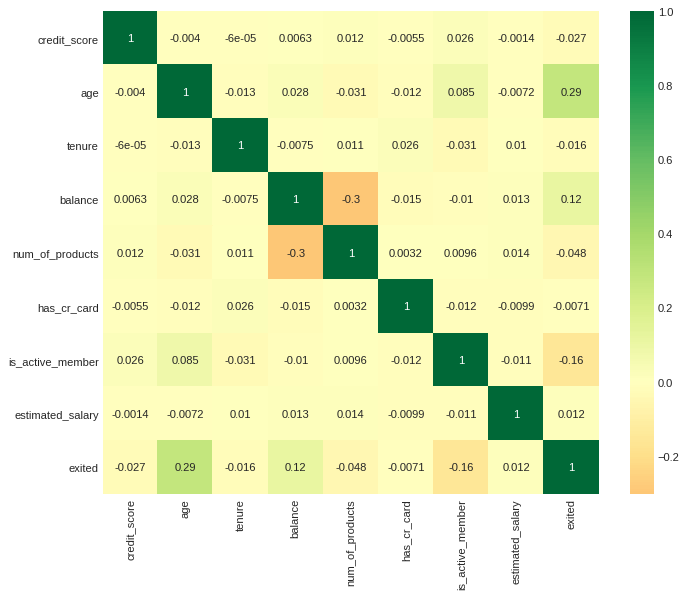

In [22]:
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Между данными отсутствует сильная корреляция и это хорошо, нам не придется удалять признаки.

### Разбиение данных на обучающую и тестовую выборки

Разобьем исходный датафрейм на 2 части: в **features** запишем признаки, на основе которых будет делаться предсказание, а в **target** запишем целевой признак - то значение, которое мы хотим предсказать, т.е. столбец **exited.**

In [23]:
features = data_ohe.drop(['exited'], axis = 1)
target = data_ohe['exited'] 

Т.к. далее мы будем использовать GridSearchCV для подбора гиперпараметров модели, то разобьем исходный датасет на 2 выборки: обучающую и тестовую, при этом 75% данных запишем в обучающую выборку, а 25% для окончательной оценки моделей.

In [24]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=seed, stratify=data_ohe['exited'])

Проверим отношения классов в наших выборках и сравним их с отношением в исходном датафрейме.

In [25]:
print('Отношение классов в исходном датасете:')
print(data_ohe['exited'].value_counts(normalize=True))
print('')

print('Отношение классов в обучающей выборке:')
print(target_train.value_counts(normalize=True))
print('')

print('Отношение классов в тестовой выборке:')
print(target_test.value_counts(normalize=True))
print('')

Отношение классов в исходном датасете:
0    0.7963
1    0.2037
Name: exited, dtype: float64

Отношение классов в обучающей выборке:
0    0.796267
1    0.203733
Name: exited, dtype: float64

Отношение классов в тестовой выборке:
0    0.7964
1    0.2036
Name: exited, dtype: float64



В наших выборках классы 0 и 1 соотносятся в тех же пропорциях, что и в исходном датасете.

Проверим размеры наших выборок:

In [26]:
print(df.shape)
print(features_train.shape)
print(features_test.shape)

(10000, 14)
(7500, 11)
(2500, 11)


In [27]:
print(df.shape)
print(target_train.shape)
print(target_test.shape)

(10000, 14)
(7500,)
(2500,)


**Вывод по разбиению данных:**

Мы случайным образом разбили наш исходный датафрейм на 2 выборки: обучающую и тестовую, при этом выборки относятся как 0.75:0.25. Обучающую выборку мы будем использовать для тренировки нашей модели, а тестовую для окончательной оценки модели.

### Мастштабирование признаков

При обучении моделей может возникнуть проблема с тем, что разные признаки будут оцениваться моделью по-разному, из-за их размахов. Чтобы избежать этой проблемы данные нужно отмасштабировать.

Для этого мы стандартизируем количественные признаки под стандартное распределение (мат. ожидание равно 0 и стандартное отклонение, равно 1.) Для масштабирования в библиотеке sklearn есть готовая функция StandardScaler().

Ранее мы выяснили, что к количественным признакам отнесем столбцы: **credit_score, age, tenure, num_of_products, balance и estimated_salary.** Запишем эти столбцы в переменную numeric.

In [28]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [29]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

Создаем объект scaler и с помощью метода .fit() настроим его на обучающей выборке (подразумевается вычисление среднего и std).

In [30]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

Теперь можно отмасштабировать признаки, используя метод .transform().

In [31]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [32]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
9613,-0.158560,-0.559836,-1.443007,-1.224534,2.503841,0,0,1.355994,0,0,1
4218,-0.634052,-1.895596,1.444547,0.117043,-0.917330,1,1,0.748842,1,0,0
3886,0.616697,-0.464425,1.083603,1.150812,0.793256,0,1,-1.701953,1,0,1
1501,0.110195,-0.750659,0.722659,1.091827,0.793256,1,1,-1.477956,0,0,0
4994,1.505659,1.252981,0.000770,1.461900,-0.917330,1,1,-0.640848,1,0,0


**Вывод по подготовке данных**

В датасете содержится 10000 строк, где каждая строка это уникальный клиент, а так же 14 признаков, которые содержат различную информацию о клиенте. В созданном нами датафрейме сохранены данные 3 типов: float, int и object. Так же в датафрейме присутствуют пропущенные значения в столбце **Tenure** - их 909. Грубые дубликаты отсутствуют.


Целевым признаком в датасете является столбец **Exited**, в котором присутсвует два значения 0 и 1, причем 1 означает, что клиент более не пользуется услугами банка. Распределение классов целевого признака следующее:

* Пользуются услугами банка - 0.7963
* Не пользуются услугами банка - 0.2037


Признаками содержащими лишнюю информацию для машинного обучения являются: **Surname, RowNumber** и **CustomerId.**


Остальные признаки делятся на две группы: количественные и категориальные.

* Категориальные: **Gender, Geography, HasCrCard** и **IsActiveMember**
* Количественные: **CreditScore, Age, Tenure, NumOfProducts, Balance** и **EstimatedSalary**


В категориальных признаках сохранена следующая информация:

* Gender: Male или Female
* Geography: France, Germany или Spain
* HasCrCard: 0 или 1 (есть кредитная карта или нет)
* IsActiveMember: 0 или 1 (активный пользователь или нет, при этом пояснения к тому что это значит у нас нет.)


Количественные признаки имеют следующие размахи и средние:

* CreditScore: от 350 до 850, среднее 650, медиана 652.
* Age: от 18 до 92, среднее 39, медиана 37.
* Tenure: от 0 до 10, среднее 5, медиана 5.
* Balance: от 0 до 250898.09, среднее 76485.89, медиана 97198.
* NumOfProducts: от 0 до 4, медиана 1.
* EstimatedSalary: от 11.58 до 199992.48, среднее 100090, медиана 100193.


В количественных признаках отсутствуют странные и выбивающиеся значения (например отрицательное количество лет или зарплата).

На этапе предобработки данных мы выполнили первичную подготовку данных для дальнейшего анализа и машинного обучения:

1. Переименовали столбцы датафрейма для удобства работы с ними.
2. Привели к нижнему регистру значения столбцов **gender** и **geography**
3. Исправили пропущенные значения в столбце **tenure**, заменив их на 0, исходя из той гипотезы, что пропущенные значения оказались у тех людей, которые не владеют недвижимостью.
4. Изменили тип данных столбца **tenure** на int, т.к. предпологается наличие целочисленных значений в данном столбце.
5. Создали новый датафрейм без лишних столбцов: **surname, rowNumber** и **customerId**, а так же создали новые столбцы для категориальных признаков, преобразовав их в численные, воспользовавшись методом преображения (прямого кодирования).

Затем мы случайным образом разбили наш исходный датафрейм на 2 выборки: обучающую и тестовую, при этом выборки относятся как 0.75:0.25. Обучающую выборку мы будем использовать для тренировки нашей модели, а тестовую для окончательной оценки модели.

Мы изучили корреляцию между данными в датасете и выяснили, что между признаками нет сильной корреляции, а это значит, что нам не требуется дополнительная обработка данных, связанная с устранением мультиколлиниарности.

В конце этапа подготовки данных мы отмасштабировали данные, используя StandardScaler() из библиотеки sklearn, с помощью которой привели данные к единому масштабу: математическое ожидание признаков стало равно 0, а стандартное отклонение = 1.

Таким образом мы подготовили данные к построению моделей и предсказанию результатов.

## Исследование задачи

Нашим основным заданием является построение модели, предсказывающей уход клиента из банка.

* Основной метрикой является F1_score, его значение должно быть больше 0.59.
* Дополнительной метрикой является AUC_score


Выберем 3 модели для исследования:

* Модель древа решений DecisionTreeClassifier
* Модель случайного леса RandomForestClassifier
* Модель логистической регрессии LogisticRegression

Обучим модели при стандартным параметрах и вычислим их метрики.

<font color='blue'> Переберём гиперпараметры объектов вручную без учета дисбаланса классов в датасете.
</font>
    

In [33]:
%%time
best_accuracy = 0
best_depth = 0
for depth in tqdm(range(1,16)):
    model = DecisionTreeClassifier(max_depth=depth, random_state=seed)
    model.fit(features_train, target_train)
    accuracy = model.score(features_test, target_test)
    if accuracy > best_accuracy:
        print("Глубина дерева:", depth, "качество:" ,accuracy)
        best_accuracy = accuracy
        best_depth = depth
print("Лучшая глубина дерева:", best_depth, "Лучшее Качество:", best_accuracy)

  0%|          | 0/15 [00:00<?, ?it/s]

Глубина дерева: 1 качество: 0.7964
Глубина дерева: 2 качество: 0.8184
Глубина дерева: 3 качество: 0.8404
Глубина дерева: 4 качество: 0.8416


 40%|████      | 6/15 [00:00<00:00, 58.35it/s]

Глубина дерева: 5 качество: 0.8472
Глубина дерева: 6 качество: 0.8552


100%|██████████| 15/15 [00:00<00:00, 40.13it/s]

Лучшая глубина дерева: 6 Лучшее Качество: 0.8552
CPU times: user 342 ms, sys: 15.7 ms, total: 358 ms
Wall time: 378 ms


In [34]:
%%time
best_accuracy = 0
best_depth = 0
for depth in tqdm(range(1,10)):
    for est in range(5,50,5):
        for sample in range(2,5):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est, min_samples_leaf=sample, random_state=seed)
            model.fit(features_train, target_train)
            accuracy = model.score(features_test, target_test)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_depth = depth
                best_est = est
                best_sample = sample
print("Глубина дерева:", best_depth, "    Количество деревьев:", best_est, "   мин. объектов в узле:", best_sample, "  Качество:", best_accuracy)       

100%|██████████| 9/9 [00:27<00:00,  3.03s/it]

Глубина дерева: 7     Количество деревьев: 5    мин. объектов в узле: 2   Качество: 0.864
CPU times: user 27.1 s, sys: 105 ms, total: 27.2 s
Wall time: 27.3 s


In [35]:
%%time

best_max_iter = 0
best_accuracy = 0

for max_iter in tqdm((range(1,10))):
    model = LogisticRegression(random_state=seed, max_iter=max_iter)
    model.fit(features_train, target_train)
    accuracy = model.score(features_test, target_test)
    print('Количество итерраций', max_iter,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_max_iter = max_iter
        best_accuracy = accuracy

print('Лучшее количество итерраций', best_max_iter,'Лучшая точность', best_accuracy) 

 22%|██▏       | 2/9 [00:00<00:00, 17.03it/s]

Количество итерраций 1 Точность 0.7964
Количество итерраций 2 Точность 0.7992
Количество итерраций 3 Точность 0.8072


 44%|████▍     | 4/9 [00:00<00:00, 11.90it/s]

Количество итерраций 4 Точность 0.8092
Количество итерраций 5 Точность 0.812


 67%|██████▋   | 6/9 [00:00<00:00,  7.37it/s]

Количество итерраций 6 Точность 0.8136


 78%|███████▊  | 7/9 [00:00<00:00,  7.78it/s]

Количество итерраций 7 Точность 0.8128


 89%|████████▉ | 8/9 [00:01<00:00,  6.84it/s]

Количество итерраций 8 Точность 0.8128


100%|██████████| 9/9 [00:01<00:00,  7.39it/s]

Количество итерраций 9 Точность 0.8124


Лучшее количество итерраций 6 Лучшая точность 0.8136
CPU times: user 305 ms, sys: 943 ms, total: 1.25 s
Wall time: 1.22 s


In [36]:
DT = DecisionTreeClassifier(max_depth=6,random_state=seed)   #Дерево решений
RF = RandomForestClassifier(max_depth=8, n_estimators=25, min_samples_leaf=3,random_state=seed)  #Случайный лес
LR = LogisticRegression(max_iter=6,random_state=seed, solver='liblinear')   #Логистическая регрессия
models_list = [DT, RF, LR]
models_dict = {DT:'Дерево решений',
               RF:'Случайный лес',
               LR:'Логистическая регрессия'}

Создадим две функции **f1_cv_score** и **roc_auc_cv_score**, которые будут вычислять основные метрики: f1 и roc-auc. На вход функции будут получать список моделей, признаков, целевого признака и количества разбиений при кросс-валидации. Возвращать функции будут список с результатами оценок.

Так же создадим функцию **roc_plotter**, которая будет отрисовывать ROC-кривые при кросс валидации. На вход наша функция должна принимать название модели, данные, целевой признак и количество разбиений, а возвращать будет график кривых при кроссвалидации, попутно еще раз вычисляя среднюю кривую.

In [37]:
def f1_cv_score(models, features, target, cv):
    cv_scores = []
    for model in models:
        score = cross_val_score(model, features, target, cv=cv, scoring='f1').mean()
        cv_scores.append(score)    
            
    return cv_scores

In [38]:
def roc_auc_cv_score(models, features, target, cv):
    cv_scores = []
    for model in models:
        score = cross_val_score(model, features, target, cv=cv, scoring='roc_auc').mean()
        cv_scores.append(score)    

    return cv_scores

In [39]:
def roc_plotter(model, features, target, n_splits):

    
    features_train_auc = features.values
    target_train_auc = target.values
    
    cv = StratifiedKFold(n_splits=n_splits)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    fig, ax = plt.subplots(figsize=(12,8))
    for i, (train, valid) in enumerate(cv.split(features_train_auc, target_train_auc)):
        model.fit(features_train_auc[train], target_train_auc[train])
        viz = plot_roc_curve(model, features_train_auc[valid], target_train_auc[valid],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Случайная кривая', alpha=.8)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Средняя ROC кривая (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')
    
    ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0],
           title="ROC-кривая {}".format(models_dict[model]))
    ax.legend(loc="lower right")
    plt.show()

Нарисуем кривые, используя нашу функцию:

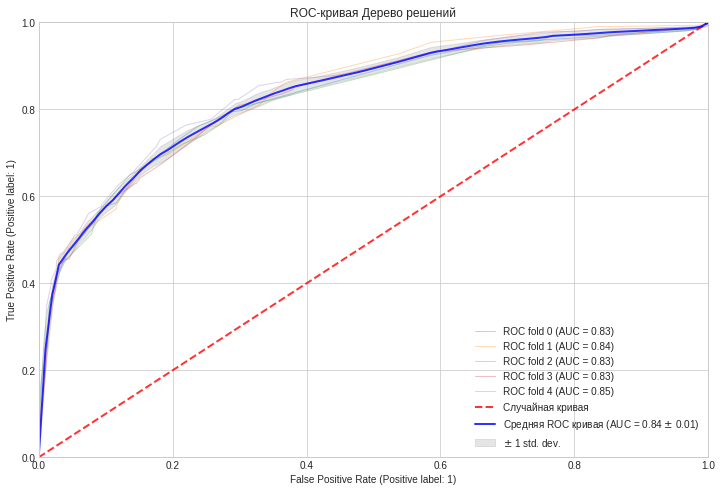

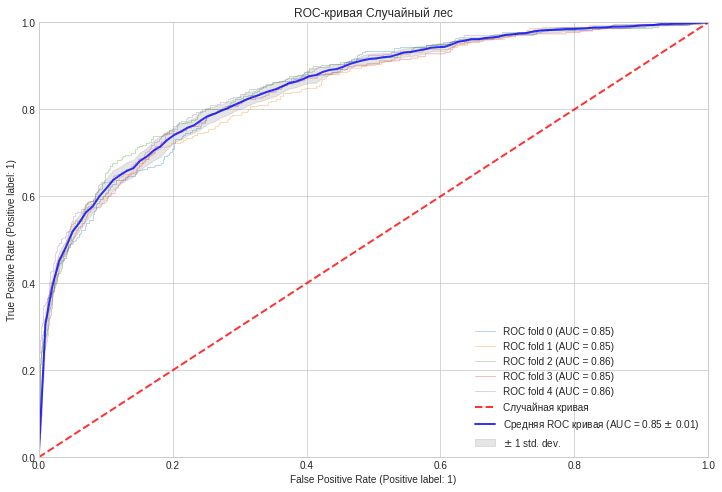

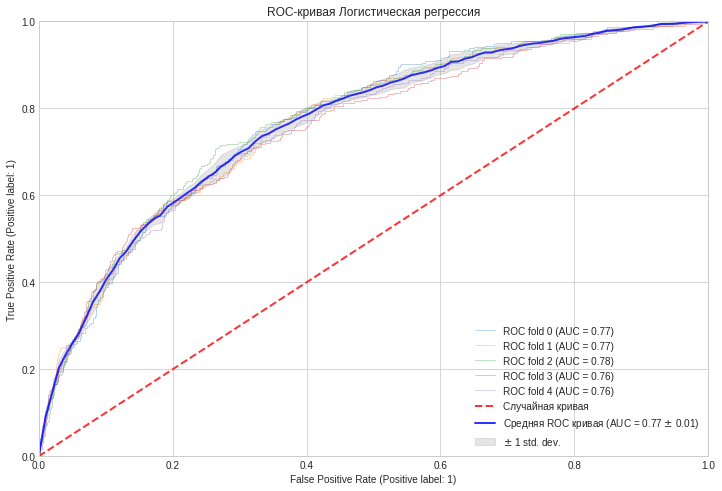

In [40]:
for model in models_list:
    roc_plotter(model, features_train, target_train, 5)

А так же создадим сводную табличку с результатами оценок на тренировочной выборке.

In [41]:
columns = ['DecisionTree', 'RandomForest', 'LogisticRegression']
index = ['f1_cv', 'roc_auc_cv']

scores_f1 = f1_cv_score(models_list, features_train, target_train, 5)
scores_roc_auc = roc_auc_cv_score(models_list, features_train, target_train, 5)

models_pivot_basic = pd.DataFrame(data=[scores_f1, scores_roc_auc], index=index, columns=columns)
models_pivot_basic

,DecisionTree,RandomForest,LogisticRegression
f1_cv,0.563310,0.562750,0.318274
roc_auc_cv,0.835943,0.853591,0.766574


**Вывод по исследованию задачи:**

При обучении моделей на тренировочной выборке f1_score довольно низкий, а roc_auc высокий. Это говорит нам о том, что наши модели работают плохо, и мы можем их улучшить.

Ранее мы разбивали выборки, сохраняя то же отношение между классами, что и в исходном датасете.

Попробуем устранить диcбаланс классов и проверим, как это скажется на качестве наших моделей.



## Борьба с дисбалансом

Для борьбы с дисбалансом изучим 2 метода:

1. downsampling - метод заключается в том, чтобы уменьшить частоту самого встречающегося класса. В нашем случае попробуем сбалансировать классы 0.5:0.5.
2. Посмотрим, улучшатся ли показатели модели при добавлении в нее аргумента class_weight='balanced'.

Для начала, напишем функцию, которая произведет downsampling попавшей в нее выборки. На вход будет передавать данные, целевой признак, отношение в котором уменьшаем класс и сам класс, который необходимо уменьшить.

In [42]:
def downsample(features, target, fraction, downsampling_class):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    if downsampling_class == 0:
        features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=seed)] + [features_ones])
        target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=seed)] + [target_ones])
        features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=seed)
        
    if downsampling_class == 1:
        features_downsampled = pd.concat([features_zeros] + [features_ones.sample(frac=fraction, random_state=seed)])
        target_downsampled = pd.concat([target_zeros] + [target_ones.sample(frac=fraction, random_state=seed)])
        features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=seed)
       
    return features_downsampled, target_downsampled

Еще раз посмотрим на отношение классов в обучающей выборке.

In [43]:
print('Отношение классов в обучающей выборке:')
print(target_train.value_counts(normalize=True))
print('')

Отношение классов в обучающей выборке:
0    0.796267
1    0.203733
Name: exited, dtype: float64



Класса 0 в четыре раза больше, чем класса 1. Уменьшим этот класс в 4 раза, используя нашу функцию.

In [44]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25, 0)
print(target_downsampled.value_counts(normalize = 1))
print(target_downsampled.shape)

1    0.505793
0    0.494207
Name: exited, dtype: float64
(3021,)


Построим ROC кривые:

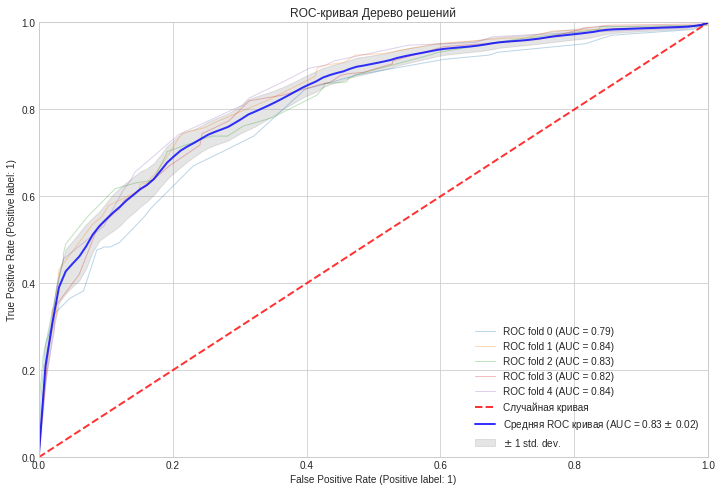

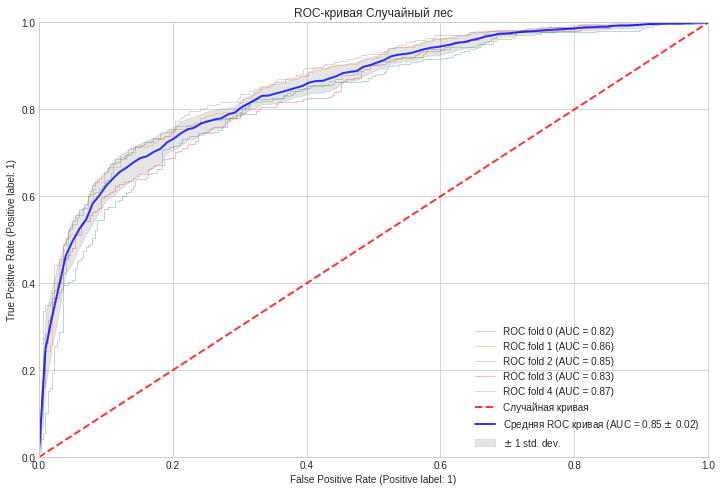

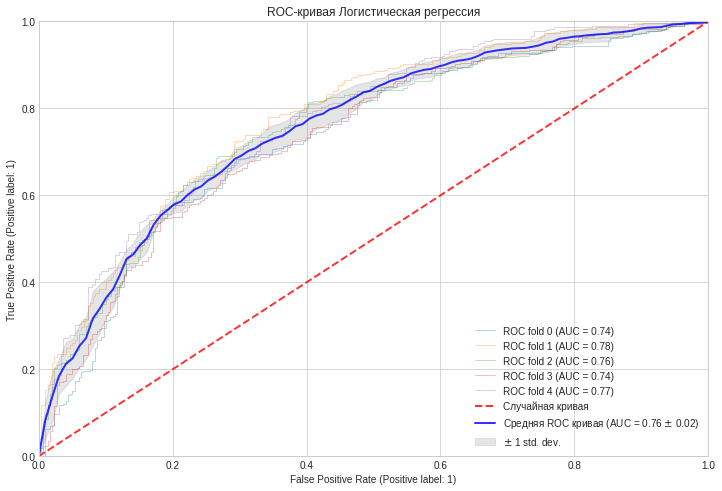

In [45]:
for model in models_list:
    roc_plotter(model, features_downsampled, target_downsampled, 5)

Вычислим наши метрики при кросс-валидации и сравним результаты с метриками, полученными при обучении не параметризированных моделей.

In [46]:
scores_f1_downsampled = f1_cv_score(models_list, features_downsampled, target_downsampled, 5)
scores_roc_auc_downsampled = roc_auc_cv_score(models_list, features_downsampled, target_downsampled, 5)

models_pivot_basic.loc['f1_cv_downsampled', columns] = scores_f1_downsampled
models_pivot_basic.loc['roc_auc_cv_downsampled', columns] = scores_roc_auc_downsampled

In [47]:
models_pivot_basic.loc[['f1_cv', 'f1_cv_downsampled']]

,DecisionTree,RandomForest,LogisticRegression
f1_cv,0.563310,0.562750,0.318274
f1_cv_downsampled,0.744359,0.760676,0.692561


In [48]:
models_pivot_basic.loc[['roc_auc_cv', 'roc_auc_cv_downsampled']]

,DecisionTree,RandomForest,LogisticRegression
roc_auc_cv,0.835943,0.853591,0.766574
roc_auc_cv_downsampled,0.825995,0.846502,0.756997


Нам удалось значительно увеличить нашу основную метрику - f1_score для всех моделей, причем значительно, а вот значения AUC-ROC почти не изменились. Попробуем так же улучшить сами модели, перебрав гиперпараметры.

Для перебора гиперпараметров воспользуемся поиском по сетке GridSearchCV. Так же при переборе параметров, узнаем, улучшится ли метрика при использовании class_weight='balanced'.

In [49]:
%%time

depth_array = np.linspace(1,24,24)              
min_samples_leaf_array = [1,3,5,7,9,11] 
criterion_array = ['gini', 'entropy']
class_weight_array = ['balanced', None]

parameters = {'max_depth': depth_array,
              'criterion': criterion_array,
              'min_samples_leaf': min_samples_leaf_array,
              'class_weight': class_weight_array}


grid_DT = GridSearchCV(DT, param_grid=parameters, scoring = 'f1', cv=5)
grid_DT.fit(features_downsampled, target_downsampled)
print(grid_DT.best_score_)
print(grid_DT.best_estimator_)
print(grid_DT.best_params_)
DT_bestmodel = grid_DT.best_estimator_

0.7527831443819548
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6.0, min_samples_leaf=11,
                       random_state=31313131)
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6.0, 'min_samples_leaf': 11}
CPU times: user 37 s, sys: 160 ms, total: 37.2 s
Wall time: 37.3 s


In [53]:
%%time
depth_array = np.linspace(1,10,10)
min_samples_leaf_array = [1,5,9]
criterion_array = ['gini', 'entropy']
class_weight_array = ['balanced', None]
est_array = [10,90]

parameters = {'max_depth': depth_array,
              'criterion': criterion_array,
              'min_samples_leaf': min_samples_leaf_array,
              'class_weight': class_weight_array,
              'n_estimators': est_array}


grid_RF = GridSearchCV(RF, param_grid=parameters, scoring = 'f1', cv=5)
grid_RF.fit(features_downsampled, target_downsampled)
print(grid_RF.best_score_)
print(grid_RF.best_estimator_)
print(grid_RF.best_params_)
# ревьюер: добавил строку снизу, про нее забыли.
RF_bestmodel = grid_RF.best_estimator_

0.774165452371865
RandomForestClassifier(class_weight='balanced', max_depth=9.0,
                       min_samples_leaf=5, n_estimators=90,
                       random_state=31313131)
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9.0, 'min_samples_leaf': 5, 'n_estimators': 90}
CPU times: user 2min 29s, sys: 801 ms, total: 2min 30s
Wall time: 2min 30s


In [54]:
%%time

C_array = np.logspace(-2, 3, 20)                  
intercept_array = np.linspace(1,6,6)             
penalty_array = ['l1', 'l2'] 
class_weight_array = ['balanced', None]

parameters = {'C': C_array, 
              'intercept_scaling': intercept_array, 
              'penalty':penalty_array,
              'class_weight':class_weight_array}


grid_LR = GridSearchCV(LR, scoring = 'f1', param_grid=parameters, cv=5) 
                       
grid_LR.fit(features_downsampled, target_downsampled)
print(grid_LR.best_score_)
print(grid_LR.best_estimator_)
print(grid_LR.best_params_)
LR_bestmodel = grid_LR.best_estimator_

0.7038903717890019
LogisticRegression(C=0.01, intercept_scaling=1.0, max_iter=6, penalty='l1',
                   random_state=31313131, solver='liblinear')
{'C': 0.01, 'class_weight': None, 'intercept_scaling': 1.0, 'penalty': 'l1'}
CPU times: user 20.9 s, sys: 84.1 ms, total: 21 s
Wall time: 21 s


Для моделей дерева решений и случайного леса лучшими оказались параметры, содержащие class_weight='balanced'.

In [55]:
best_models = [DT_bestmodel, RF_bestmodel, LR_bestmodel]
models_dict = {DT_bestmodel:'Дерево решений',
               RF_bestmodel:'Случайный лес',
               LR_bestmodel:'Логистическая регрессия'}

Занесем метрики наших моделей в таблицу

In [56]:
scores_f1_gridsearch = f1_cv_score(best_models, features_downsampled, target_downsampled, 5)
scores_roc_auc_gridsearch = roc_auc_cv_score(best_models, features_downsampled, target_downsampled, 5)

models_pivot_basic.loc['f1_gridsearch', columns] = scores_f1_gridsearch
models_pivot_basic.loc['roc_auc_gridsearch', columns] = scores_roc_auc_gridsearch

Построим ROC-кривые наших моделей:

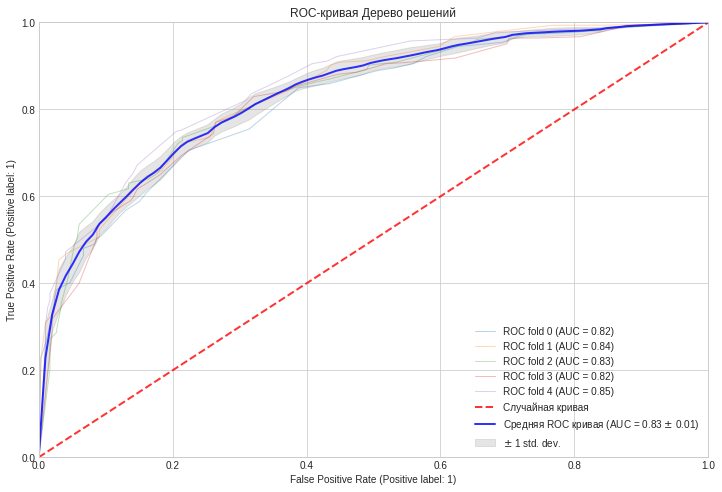

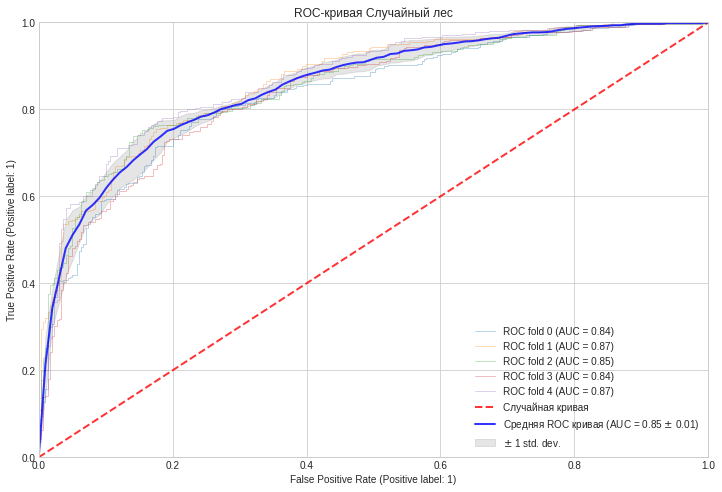

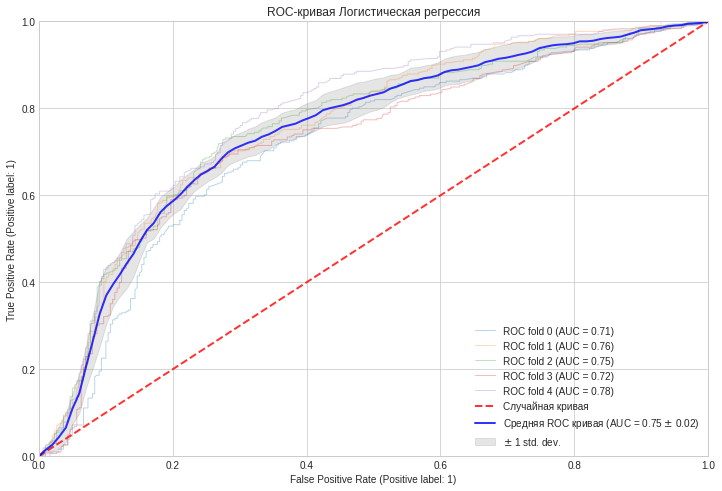

In [57]:
for model in best_models:
    roc_plotter(model, features_downsampled, target_downsampled, 5)

И сравним окончательные оценки моделей после подбора гиперпараметров.

In [58]:
models_pivot_basic.loc[['f1_cv', 'f1_cv_downsampled', 'f1_gridsearch']]

,DecisionTree,RandomForest,LogisticRegression
f1_cv,0.563310,0.562750,0.318274
f1_cv_downsampled,0.744359,0.760676,0.692561
f1_gridsearch,0.752783,0.774165,0.703890


In [59]:
models_pivot_basic.loc[['roc_auc_cv', 'roc_auc_cv_downsampled', 'roc_auc_gridsearch']]

,DecisionTree,RandomForest,LogisticRegression
roc_auc_cv,0.835943,0.853591,0.766574
roc_auc_cv_downsampled,0.825995,0.846502,0.756997
roc_auc_gridsearch,0.833908,0.853642,0.746398


**Вывод по этапу устранения дисбаланса классов:**

В результате исследования нам удалось значительно улучшить модели, мы смогли увеличить наши метрики, использовав при этом downsampling и взвешивание классов.

Окончательныве результаты:

* Лучшая модель - случайный лес:
    * f1 мера увеличилась с 0.59 до 0.77 при кросс-валидации
    * roc_auc осталась практически неизменной при кросс-валидации
* Следующая модель по f1 мере - дерево решений:
    * f1 мера увеличилась с 0.68 до 0.83 при кросс-валидации
    * roc_auc увеличилась с 0.68 до 0.83 при кросс-валидации
* Худшая метрика у логистической регрессии:
    * f1 мера увеличилась с 0.31 до 0.7 при кросс-валидации
    * roc_auc осталась практически неизменной при кросс-валидации

## Тестирование модели

Последним шагом в нашем проекте является тестирование модели.

Ранее мы отобрали из общего датасета выборку, а так же сами данные не отмасштабированы. Выясним, как поведет себя модель в таких условиях:

In [60]:
test_scores_f1 = []
test_scores_auc = []
for model in best_models:
    test_scores_f1.append(f1_score(target_test, model.predict(features_test)))
    test_scores_auc.append(roc_auc_score(target_test, model.predict(features_test)))
    
models_pivot_basic.loc['f1_test', columns] = test_scores_f1
models_pivot_basic.loc['roc_auc_test', columns] = test_scores_auc

In [61]:
models_pivot_basic.loc[['f1_test','roc_auc_test']]

,DecisionTree,RandomForest,LogisticRegression
f1_test,0.587519,0.609240,0.477366
roc_auc_test,0.773951,0.786944,0.690918


По требованиям, нам было необходимо получить значение F1 меры больше, чем 0.59. С этим условием справилась только 1 модель - модель случайного леса, ее метрики:

* f1 мера = 0.6
* AUC-ROC = 0.78

**Вывод по проекту**

Основной задачей проекта было достижение f1 меры > 0.59. С этой задачей справилась только одна модель - модель случайного леса. 

<font color='blue'> Её гиперпараметры:
* 'class_weight': 'balanced', 
* 'criterion': 'gini',
* 'max_depth': 9.0, 
* 'min_samples_leaf': 5, 
* 'n_estimators': 90.
</font>

Ее метрики на тестовой выборке:

* f1 мера = 0.6
* AUC-ROC = 0.78

Для преодоления порога нам потребовалось провести подготовку данных, которая состояла из:

1. Изучения общей информации о данных
2. Предобработки пропущенных значений, названий столбцов и изменения типов данных
3. Изучения взаимосвязей в данных
4. Разбиения данных на обучающую и тестовую выборки
5. Масштабирования обучающих данных

После того, как мы подготовили данные, мы приступили к исследованию задачи. Для этого мы выбрали 3 модели: DecisionTree, RandomForest, LogisticRegression и вычислили их метрики используя кросс-валидаци. Оказалось, что наши модели имеют низкую f1 меру, но при этом высокую AUC-ROC.

Для того, чтобы улучшить модели мы устранили дисбаланс классов и провели подбор гиперпараметров моделей. Это позволило нам улучшить метрики и значительно увеличить f1 меру.

Улучшенные модели мы протестировали и выяснили, что модели DecisionTree и LogisticRegression не проходят требуемый порог.